In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Dummy Data HSS.csv")

In [3]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [5]:
import seaborn as sns

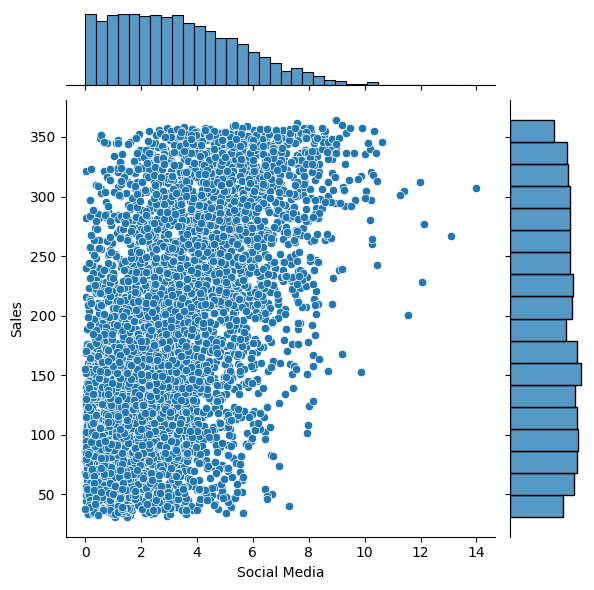

In [6]:
sns.jointplot(x="Social Media",y="Sales",data=df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [8]:
df.TV=df.TV.fillna(df.TV.mean())
df.Radio=df.Radio.fillna(df.Radio.mean())
df["Social Media"]=df["Social Media"].fillna(df["Social Media"].mean())
df.Sales=df.Sales.fillna(df.Sales.mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


As there is no significant difference between mean and median we dont need to treat the outliers

In [30]:
df=pd.get_dummies(df,drop_first=True)

In [31]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,1,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0


In [32]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,-0.011701,-0.004099,-0.003289
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.335465,-0.334495,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TV                4572 non-null   float64
 1   Radio             4572 non-null   float64
 2   Social Media      4572 non-null   float64
 3   Sales             4572 non-null   float64
 4   Influencer_Mega   4572 non-null   uint8  
 5   Influencer_Micro  4572 non-null   uint8  
 6   Influencer_Nano   4572 non-null   uint8  
dtypes: float64(4), uint8(3)
memory usage: 156.4 KB


# Assignment 2


In [14]:
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import statsmodels.api as sm

In [34]:
X=sm.add_constant(df["TV"])

In [35]:
lm=sm.OLS(df.Sales,X).fit()

In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.792e+05
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:43:09   Log-Likelihood:                -15765.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4570   BIC:                         3.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2849      0.259      1.100      0.271      -0.223       0.793
TV             3.5545      0.004    824.111      0.000       3.546       3.563
==============================================================================
Omnibus:                     2844.142   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12214106.398
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                     256.200   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
y=df.Sales
X=df[["TV"]]
lm2=LinearRegression()
lm2.fit(X,y)

LinearRegression()

In [39]:
print(lm2.intercept_,lm2.coef_)

0.28490259700868137 [3.55451956]


In [40]:
#multi regression
X_multi= df.drop("Sales",axis=1)
y_multi=df.Sales

In [41]:
X_multi.head()

,TV,Radio,Social Media,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,1,0,0
1,13.0,9.237765,2.409567,1,0,0
2,41.0,15.886446,2.913410,1,0,0
3,83.0,30.020028,6.922304,1,0,0
4,15.0,8.437408,1.405998,0,1,0


In [42]:
X_multi_cons=sm.add_constant(X_multi)

In [43]:

X_multi_cons.head()

,const,TV,Radio,Social Media,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,1.0,16.0,6.566231,2.907983,1,0,0
1,1.0,13.0,9.237765,2.409567,1,0,0
2,1.0,41.0,15.886446,2.913410,1,0,0
3,1.0,83.0,30.020028,6.922304,1,0,0
4,1.0,15.0,8.437408,1.405998,0,1,0


In [44]:
lm_multi=sm.OLS(y_multi,X_multi_cons).fit()

In [45]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.139e+05
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:43:13   Log-Likelihood:                -15748.
No. Observations:                4572   AIC:                         3.151e+04
Df Residuals:                    4565   BIC:                         3.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1780      0.332     -0.536      0.592      -0.829       0.473
TV                   3.5128      0.009    407.126      0.000       3.496       3.530
Radio                0.1226      0.025      4.928      0.000       0.074       0.171
Social Media         0.0560      0.064      0.877      0.381      -0.069       0.181
Influencer_Mega      0.4330      0.318      1.362      0.173      -0.190       1.056
Influencer_Micro     0.4123      0.318      1.295      0.195      -0.212       1.036
Influencer_Nano      0.3762      0.319      1.179      0.238      -0.249       1.002
==============================================================================
Omnibus:                     2773.887   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11682222.358
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                     250.626   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lm3=LinearRegression()

In [47]:
lm3.fit(X_multi,y_multi)

LinearRegression()

In [48]:
print(lm3.intercept_,lm3.coef_)

-0.17798456560296927 [3.512761   0.12263889 0.05599117 0.43300341 0.41226441 0.37621142]


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_multi,y_multi,test_size=0.2,random_state=0)

In [51]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3657, 6) (915, 6) (3657,) (915,)


In [52]:
lm_a=LinearRegression()

In [53]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [54]:
y_test_a=lm_a.predict(X_test)

In [55]:
y_train_a=lm_a.predict(X_train)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,y_test_a)

0.9948769000112848

In [58]:
r2_score(y_train,y_train_a)

0.9929812468813468

In [59]:
from sklearn import preprocessing

In [60]:
scaler=preprocessing.StandardScaler().fit(X_train)

In [61]:
X_train_s=scaler.transform(X_train)

In [62]:
X_test_s=scaler.transform(X_test)

In [63]:
#ridge regression
from sklearn.linear_model import Ridge

In [64]:
lm_r=Ridge(alpha=0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [65]:
r2_score(y_test,lm_r.predict(X_test_s))

0.9948733475049261